### Ejercicio regresión SVR

#### Utilizando los modelos de regresión vistos hasta ahora (lineal, polinomial y SVR), genera el modelo que mejor se adapte a los datos adjuntos. La pregunta objetivo es: ¿Cuál es la longitud del pez bluegill en función de su edad?


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

In [43]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

c:\Users\eroteta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


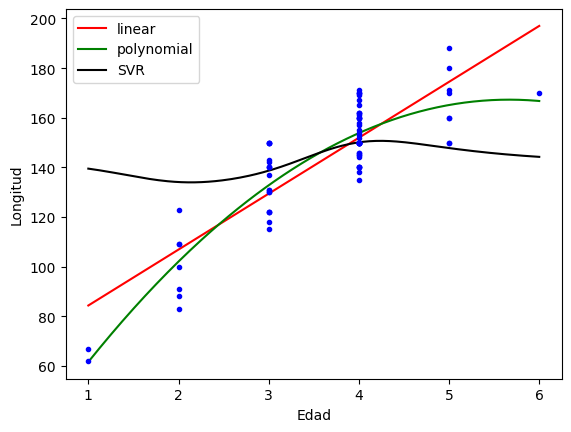

In [44]:
df = pd.read_csv("Datos mojarra americana.txt", delimiter='\t')
# train/test
x = np.reshape(df['age'].values, (len(df), 1))
y = np.reshape(df['length'].values, (len(df), 1))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
X_new = np.linspace(1, 6, 200).reshape(200, 1)
# regresión lineal
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(X_new)
# regresión polinomial
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
X_new_trans = poly.transform(X_new)
poly_lr = LinearRegression()
poly_lr.fit(x_train_trans, y_train)
y_pred_poly = poly_lr.predict(X_new_trans)
# SVR
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(X_new)
# visualizar resultados
plt.plot(X_new, y_pred_lr, color="r", label='linear')
plt.plot(X_new, y_pred_poly, color="g", label='polynomial')
plt.plot(X_new, y_pred_svr, color="k", label='SVR')
plt.plot(x, y, 'b.')
plt.xlabel("Edad")
plt.ylabel("Longitud")
plt.legend(loc='best')
plt.show()